In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
dataset = pd.read_excel("UberDataset.xlsx")
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-02-01 01:25:00,2016-02-01 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,2016-02-01 20:25:00,2016-02-01 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-05-01 17:31:00,2016-05-01 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-06-01 14:42:00,2016-06-01 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [2]:
dataset.shape

(1156, 7)

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [5]:
dataset['PURPOSE'].fillna("NOT", inplace=True)

In [6]:
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'],
									errors='coerce')
dataset['END_DATE'] = pd.to_datetime(dataset['END_DATE'],
									errors='coerce')

In [7]:
from datetime import datetime

dataset['date'] = pd.DatetimeIndex(dataset['START_DATE']).date
dataset['time'] = pd.DatetimeIndex(dataset['START_DATE']).hour

#changing into categories of day and night
dataset['day-night'] = pd.cut(x=dataset['time'],
							bins = [0,10,15,19,24],
							labels = ['Morning','Afternoon','Evening','Night'])

In [8]:
dataset.dropna(inplace=True)

In [9]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)

unique_values = {}
for col in object_cols:
  unique_values[col] = dataset[col].unique().size
unique_values

{'CATEGORY': 2, 'START': 175, 'STOP': 186, 'PURPOSE': 11, 'date': 291}

(array([  0., 100., 200., 300., 400., 500., 600.]),
 [Text(0.0, 0, '0'),
  Text(100.0, 0, '100'),
  Text(200.0, 0, '200'),
  Text(300.0, 0, '300'),
  Text(400.0, 0, '400'),
  Text(500.0, 0, '500'),
  Text(600.0, 0, '600')])

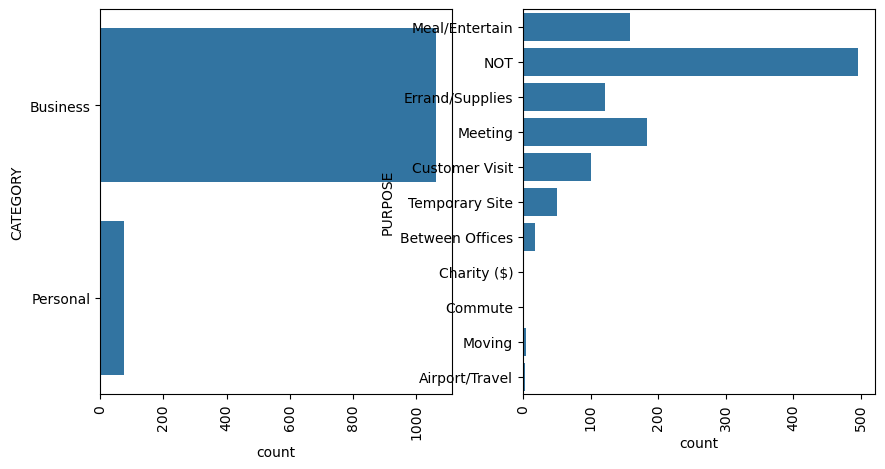

In [10]:
plt.subplot(1, 2, 1)
sns.countplot(x=dataset['CATEGORY'], palette="Blues_r")
plt.xlabel("Category", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Distribution of Ride Categories", fontsize=14, fontweight="bold")


plt.subplot(1, 2, 2)
sns.countplot(y=dataset['PURPOSE'], order=dataset['PURPOSE'].value_counts().index, palette="Blues_r")
plt.xlabel("Count", fontsize=12)
plt.ylabel("Purpose", fontsize=12)
plt.title("Distribution of Ride Purposes", fontsize=14, fontweight="bold")


plt.tight_layout()

# Show the plot
plt.show()

(array([  0., 100., 200., 300., 400., 500.]),
 [Text(0.0, 0, '0'),
  Text(100.0, 0, '100'),
  Text(200.0, 0, '200'),
  Text(300.0, 0, '300'),
  Text(400.0, 0, '400'),
  Text(500.0, 0, '500')])

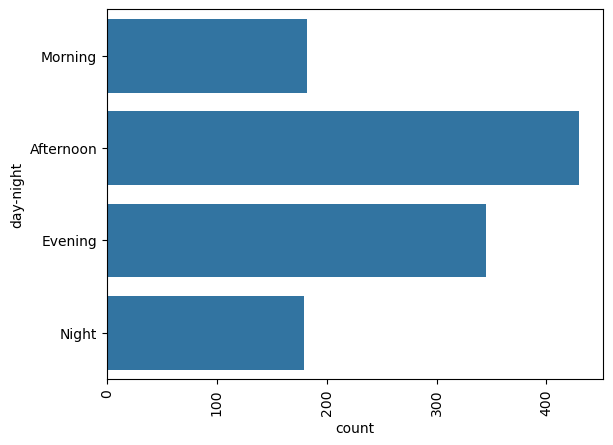

In [11]:
sns.countplot(dataset['day-night'])
plt.xticks(rotation=90)

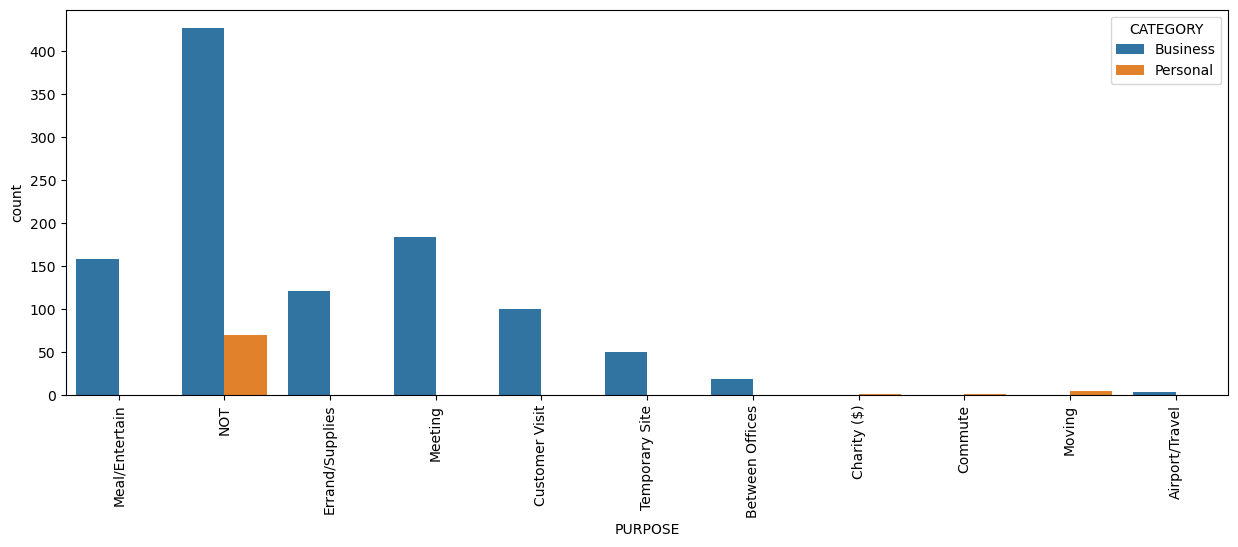

In [12]:
plt.figure(figsize=(15, 5))
sns.countplot(data=dataset, x='PURPOSE', hue='CATEGORY')
plt.xticks(rotation=90)
plt.show()

In [15]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

object_cols = ['CATEGORY', 'PURPOSE']
OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(dataset[object_cols]))
OH_cols.index = dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out(object_cols)
df_final = dataset.drop(columns=object_cols)
dataset = pd.concat([df_final, OH_cols], axis=1)
dataset.head()


,START_DATE,END_DATE,START,STOP,MILES,date,time,day-night,CATEGORY_Business,CATEGORY_Personal,...,PURPOSE_Between Offices,PURPOSE_Charity ($),PURPOSE_Commute,PURPOSE_Customer Visit,PURPOSE_Errand/Supplies,PURPOSE_Meal/Entertain,PURPOSE_Meeting,PURPOSE_Moving,PURPOSE_NOT,PURPOSE_Temporary Site
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Fort Pierce,Fort Pierce,5.1,2016-01-01,21.0,Night,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2016-02-01 01:25:00,2016-02-01 01:37:00,Fort Pierce,Fort Pierce,5.0,2016-02-01,1.0,Morning,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2016-02-01 20:25:00,2016-02-01 20:38:00,Fort Pierce,Fort Pierce,4.8,2016-02-01,20.0,Night,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2016-05-01 17:31:00,2016-05-01 17:45:00,Fort Pierce,Fort Pierce,4.7,2016-05-01,17.0,Evening,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2016-06-01 14:42:00,2016-06-01 15:49:00,Fort Pierce,West Palm Beach,63.7,2016-06-01,14.0,Afternoon,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: >

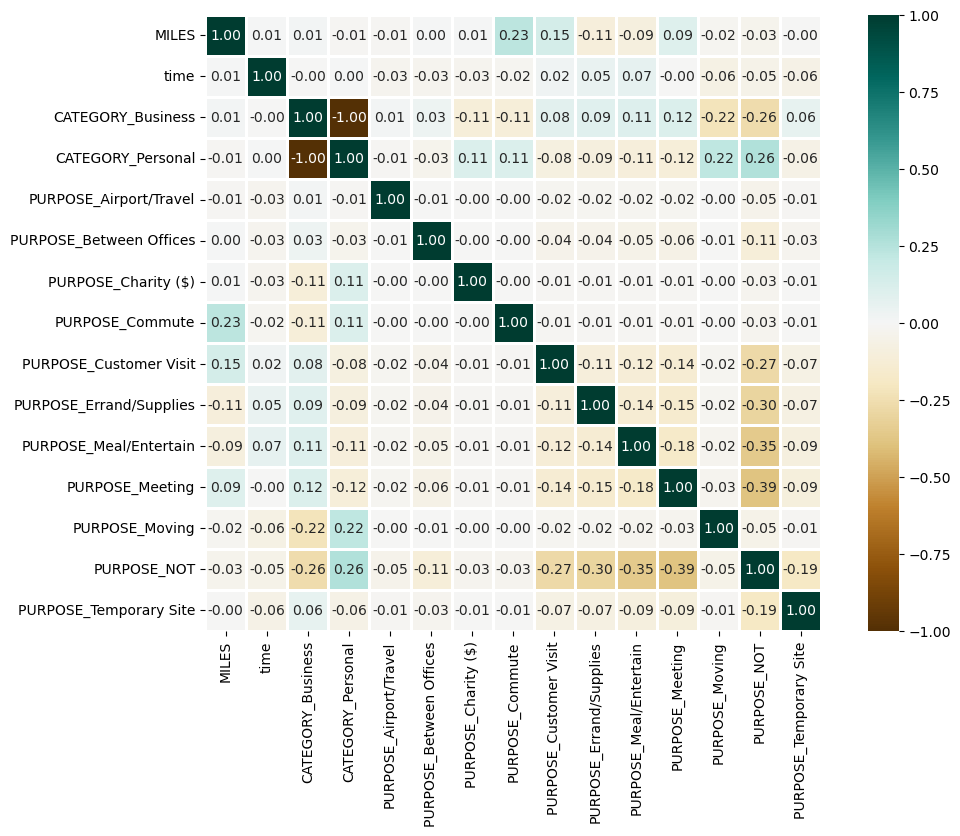

In [21]:

numeric_dataset = dataset.select_dtypes(include=['number'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_dataset.corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=1,
            annot=True,
            annot_kws={"size": 10}, 
            square=True,       
            cbar=True)

[Text(0.5, 0, 'MONTHS'), Text(0, 0.5, 'VALUE COUNT')]

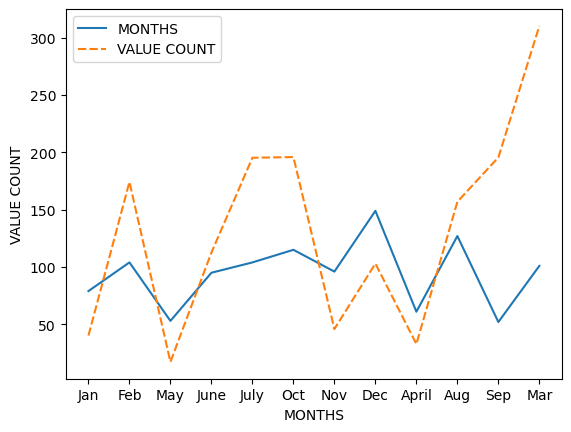

In [22]:
dataset['MONTH'] = pd.DatetimeIndex(dataset['START_DATE']).month
month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April',
			5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'Aug',
			9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'}
dataset["MONTH"] = dataset.MONTH.map(month_label)

mon = dataset.MONTH.value_counts(sort=False)

# Month total rides count vs Month ride max count
df = pd.DataFrame({"MONTHS": mon.values,
				"VALUE COUNT": dataset.groupby('MONTH',
												sort=False)['MILES'].max()})

p = sns.lineplot(data=df)
p.set(xlabel="MONTHS", ylabel="VALUE COUNT")

In [23]:
dataset['DAY'] = dataset.START_DATE.dt.weekday
day_label = {
	0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thus', 4: 'Fri', 5: 'Sat', 6: 'Sun'
}
dataset['DAY'] = dataset['DAY'].map(day_label)

Text(0, 0.5, 'COUNT')

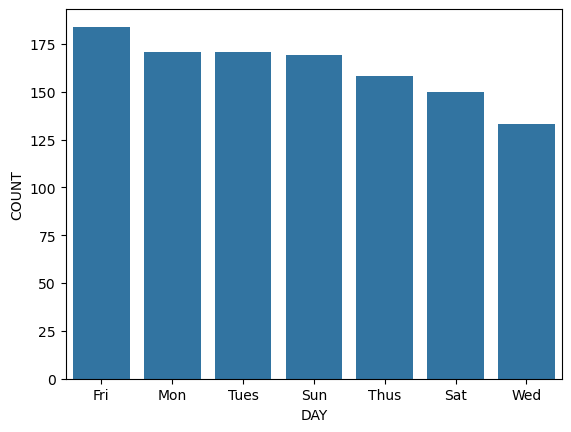

In [24]:
day_label = dataset.DAY.value_counts()
sns.barplot(x=day_label.index, y=day_label);
plt.xlabel('DAY')
plt.ylabel('COUNT')

<Axes: ylabel='MILES'>

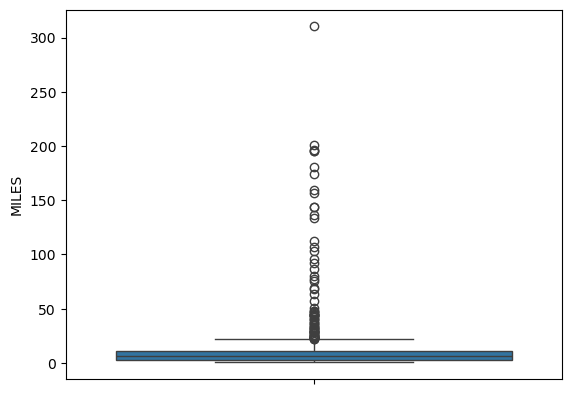

In [25]:
sns.boxplot(dataset['MILES'])

<Axes: ylabel='MILES'>

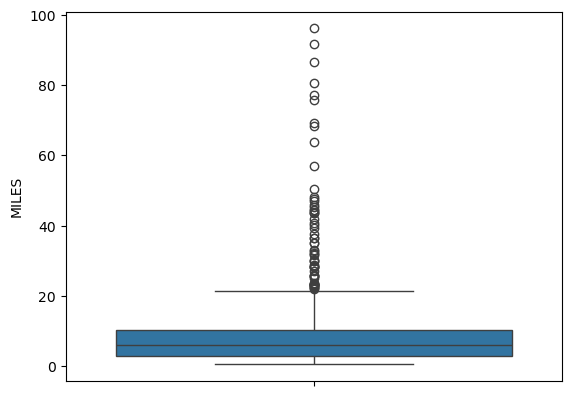

In [26]:
sns.boxplot(dataset[dataset['MILES']<100]['MILES'])

C:\Users\Asus\AppData\Local\Temp\ipykernel_25948\1678554178.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[dataset['MILES']<40]['MILES'])


<Axes: xlabel='MILES', ylabel='Density'>

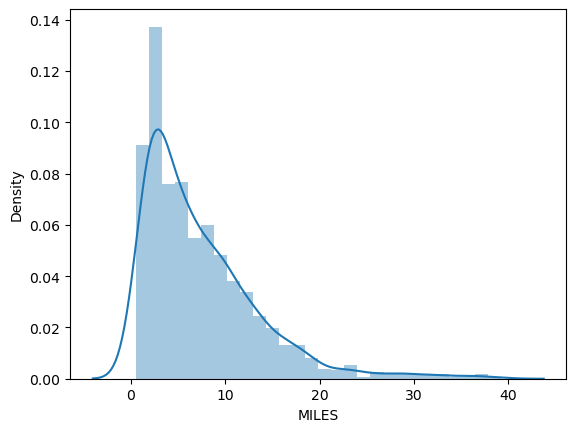

In [29]:
sns.distplot(dataset[dataset['MILES']<40]['MILES'])